In [2]:
import pandas as pd
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk

# Ensure NLTK data is downloaded
nltk.download("vader_lexicon")

# Load the dataset
reviews = pd.read_csv("Airlines_User-Reviews_Cleaned.csv")

# Instanciate the sentiment intensity analyzer
sia = SentimentIntensityAnalyzer()

# Perform sentiment analysis and add the result to new column
reviews['Sentiment_Score'] = reviews['Users Reviews'].apply(lambda x: sia.polarity_scores(x)['compound'])

# Classify sentiments based on the compound score
reviews['Sentiment'] = reviews['Sentiment_Score'].apply(lambda x: 'Positive' if x >= 0.05 else('Negative' if x<= -0.05 else 'Neutral'))

# Display the updated dataframe
print(reviews.head())

# Save the updated dataset to a new CSV file and excel file
reviews.to_csv("Airlines_User-Reviews_Sentiments.csv", index=False)
reviews.to_excel("Airlines_User-Reviews_Sentiments.xlsx", sheet_name= "Data")

print("Sentiment analysis completed. Results saved to 'Airlines_User-Reviews_Sentiments.csv'.")

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/choukrisoukehal/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


   Aircraft Type                                      Users Reviews  \
0  Not Available  ✅Trip Verified|  Cancelled our flight last-min...   
1  Not Available  ✅Trip Verified| I had a flight from Miami, Flo...   
2  Not Available  ✅Trip Verified|  We started our day with BA in...   
3  Not Available  ✅Trip Verified|  I fly British Airways weekly ...   
4  Not Available  Not Verified|  Everything was ok until our con...   

          Country Type_of_Travellers                                Route  \
0  united kingdom     Couple Leisure             London Heathrow to Tokyo   
1   united states       Solo Leisure  Miami to Dublin via London Heathrow   
2   united states           Business   Prague to San Francisco via London   
3  united kingdom           Business                    London to Glasgow   
4          france     Family Leisure   San Diego to Marseille via London    

       Seat_Types Seat Comfort      Date Flown Cabin Staff Service  \
0   Economy Class          1.0  Septembe

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/choukrisoukehal/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/choukrisoukehal/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


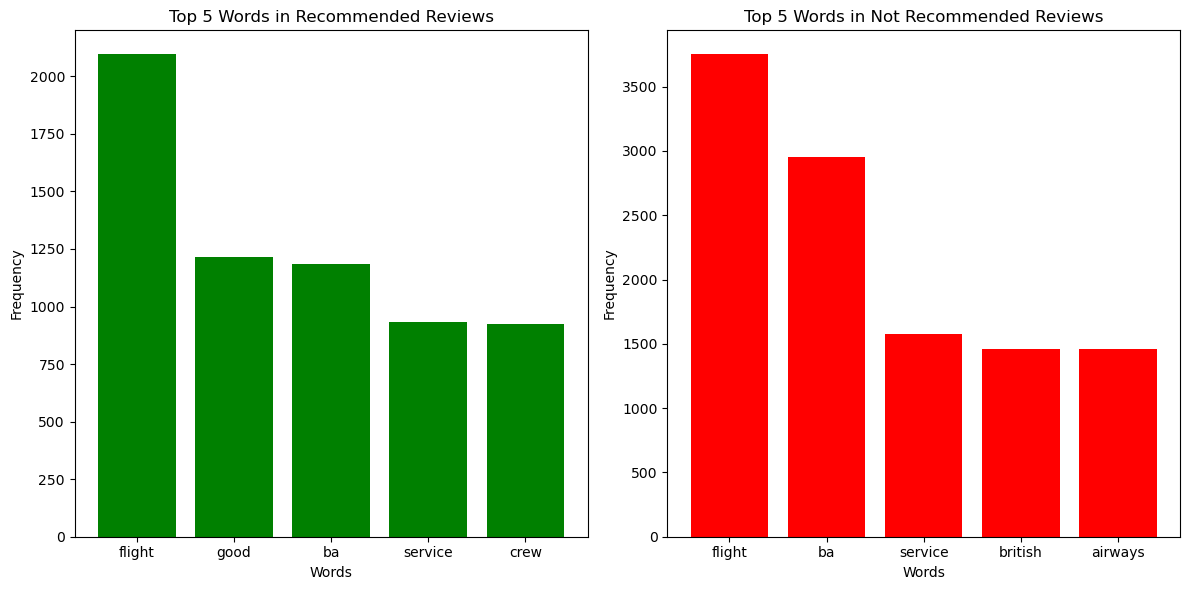

In [2]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist
import matplotlib.pyplot as plt

nltk.download('punkt')
nltk.download('stopwords')

# Assuming you have a column 'User Reviews' in your DataFrame named 'reviews'
reviews = pd.read_csv("Airlines_User-Reviews_Cleaned.csv")

# Separate reviews into recommended and not recommended
recommended_reviews = reviews[reviews['Recommended'] == 'yes']
not_recommended_reviews = reviews[reviews['Recommended'] == 'no']

# Tokenize and preprocess the text
def tokenize_and_preprocess(text):
    # Tokenize words
    tokens = word_tokenize(text.lower())
    # Remove stopwords and non-alphabetic words
    tokens = [word for word in tokens if word.isalpha() and word not in stopwords.words('english')]
    return tokens

# Tokenize and preprocess recommended reviews
recommended_tokens = recommended_reviews['Users Reviews'].apply(tokenize_and_preprocess)

# Tokenize and preprocess not recommended reviews
not_recommended_tokens = not_recommended_reviews['Users Reviews'].apply(tokenize_and_preprocess)

# Flatten the lists of tokens
recommended_word_list = [word for sublist in recommended_tokens for word in sublist]
not_recommended_word_list = [word for sublist in not_recommended_tokens for word in sublist]

# Calculate word frequencies
recommended_freqdist = FreqDist(recommended_word_list)
not_recommended_freqdist = FreqDist(not_recommended_word_list)

# Get the top 5 words for recommended and not recommended reviews
top_recommended_words = recommended_freqdist.most_common(5)
top_not_recommended_words = not_recommended_freqdist.most_common(5)

# Plot the results
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Plot top words for recommended reviews
axes[0].bar(*zip(*top_recommended_words), color='green')
axes[0].set_title('Top 5 Words in Recommended Reviews')
axes[0].set_xlabel('Words')
axes[0].set_ylabel('Frequency')

# Plot top words for not recommended reviews
axes[1].bar(*zip(*top_not_recommended_words), color='red')
axes[1].set_title('Top 5 Words in Not Recommended Reviews')
axes[1].set_xlabel('Words')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()
